<a href="https://colab.research.google.com/github/SameerCrestha/LangChain/blob/main/Lanchain_Academy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langchain_community tavily-python

In [ ]:
import os
from google.colab import userdata

def _set_env(var: str):
    os.environ[var] = userdata.get(var)

In [ ]:
_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

In [ ]:
from langchain_openai import ChatOpenAI
# gpt4o_chat = ChatOpenAI(model="gpt-4o", temperature=0)
gpt35_chat = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)

In [ ]:
from langchain_core.messages import HumanMessage

# Create a message
msg = HumanMessage(content="Hello world", name="Lance")

# Message list
messages = [msg]

In [ ]:
gpt35_chat.invoke("hello world").content

'Hello! How can I assist you today?'

### Tool Definiton

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_search = TavilySearchResults(max_results=3)
search_docs = tavily_search.invoke("What is LangGraph?")

In [ ]:
search_docs

[{'url': 'https://langchain-ai.github.io/langgraph/',
  'content': 'Overview¶. LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Check out an introductory tutorial here.. LangGraph is inspired by Pregel and Apache Beam.The public interface draws inspiration from NetworkX.LangGraph is built by LangChain Inc, the creators of LangChain, but can be used without LangChain.'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': 'LangGraph is a library within the LangChain ecosystem designed to tackle these challenges head-on. LangGraph provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured manner.'},
 {'url': 'https://hyscaler.com/insights/langgraph-new-ai-library/',
  'content': 'It is built on top of LangChain, a decentralized network for language model computation and storage, and provides a high-level abstraction for defining an

## Install Langgraph

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

# Zero-shot prompting
messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [ ]:
result = gpt35_chat.invoke(messages)

In [ ]:
type(result)

langchain_core.messages.ai.AIMessage

In [ ]:
result.content

'One of the best places to see Orcas in the US is in the Pacific Northwest, particularly in the waters around the San Juan Islands in Washington state. The waters around the San Juan Islands are home to three resident pods of Orcas, known as the Southern Resident Orcas. These Orcas are known for their distinctive black and white coloring and are a popular attraction for whale watching tours in the area. The best time to see Orcas in the San Juan Islands is typically from May to September, when the Orcas are most active in the area. Whale watching tours are available from several towns in the region, including Friday Harbor on San Juan Island and Anacortes on the mainland.'

In [ ]:
result.response_metadata

{'token_usage': {'completion_tokens': 140,
  'prompt_tokens': 68,
  'total_tokens': 208,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': None}

In [ ]:
# Define a tool
def multiply(a: int, b: int) -> int:
  """Multiply a and b.

  Args:
      a: first int
      b: second int
  """
  return a * b
llm_with_tools = gpt35_chat.bind_tools([multiply])

In [ ]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])

In [ ]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'call_ipwKA9uVg1AKXGrv2o3Pr97i',
  'type': 'tool_call'}]

### Using Messages as state

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

### Reducers

As our graph runs, we want to append messages to our messages state key. We can use reducer function to address this. **Reducers allow us to specify how state updates are performed.**

If no reducer function is specified, then it is assumed that updates to the key should override it as we saw before.
But, to append messages, we can use pre-built add_messages reducer. This ensures that any messages are appended to the existing list of messages. We simply need to annotate our messages keys with the add_messages reducer function as a metadata.

In [ ]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass

In [ ]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='285c4a9e-ddd6-4f6a-8b75-d09caef8041e'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='747a97af-0014-45e5-9420-8606075eb6b0'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='bb742be1-18e5-4153-96cc-5a947df6e903')]

## The Graph

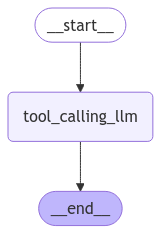

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hi there! How can I assist you today?


In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_0QZbV0vkBG9z3W3NHH8omD68)
 Call ID: call_0QZbV0vkBG9z3W3NHH8omD68
  Args:
    a: 2
    b: 3


# Define the State of the Graph

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
  graph_state: str

## Nodes

These are basiclly python functions.

The first positional argument is the state, as defined above.

In [ ]:
def node_1(state):
  print("--Node 1--")
  return {"graph_state": state['graph_state'] + " I am"}

def node_2(state):
  print("---Node 2---")
  return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
  print("---Node 3---")
  return {"graph_state": state['graph_state'] +" sad!"}

## Edges
Edges connect the nodes.
Normal edges are used if you want to always go from, for example, node_1 to node2.
Conditional edges are used if you want to optionally route between nodes.

In [ ]:
import random
from typing import Literal

def decide_mood(state) -> Literal['node_2', 'node_3']:
  user_input = state['graph_state']

  if random.random() < 0.5:
    return "node_2"

  return "node_3"

## Graph Construction

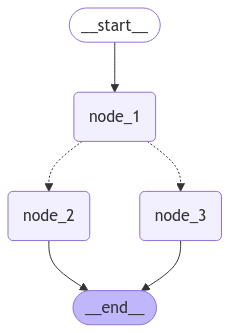

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

## Graph Invocation

The compiled graph implements the runnable protocol. The `invoke` method runs the entire graph synchronously.

In [ ]:
graph.invoke({"graph_state": "Hi, this is Adars."})

--Node 1--
---Node 3---


{'graph_state': 'Hi, this is Adars. I am sad!'}

## Router
Routers are used when the chat model should be able to route between a direct response or a tool call based on the user input.

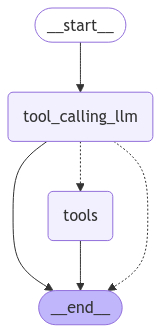

In [ ]:
# Define the graph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Node
def tool_calling_llm(state: MessagesState):
  return {"messages": [llm_with_tools.invoke(state['messages'])]}

# Build the graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply])) # can define multiple tools here as a list

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tool_calling_llm", END)
builder.add_edge("tools", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = [HumanMessage(content="Hello, what is 6 multiplied by 2? .")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Hello, what is 6 multiplied by 2? .
================================== Ai Message ==================================
Tool Calls:
  multiply (call_FQeDjcvLW2UZ2tGdYCrdk0Mp)
 Call ID: call_FQeDjcvLW2UZ2tGdYCrdk0Mp
  Args:
    a: 6
    b: 2
================================= Tool Message =================================
Name: multiply

12


In [ ]:
messages = [HumanMessage(content="Hey explain me quantum mechanics like a 5 year old!")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Hey explain me quantum mechanics like a 5 year old!
================================== Ai Message ==================================

Sure! Quantum mechanics is like a magical world where really tiny things, like atoms and particles, do things that are very different from what we see in our everyday world. It's like a special secret that scientists use to understand how the tiniest things in the universe work. Just like how you have your own special toys and games, quantum mechanics is like a special toy for scientists to play with and learn new things about the world!


## Building the Agent comprising everything

In the above router, we invoked the model and, if it chose to call a tool, we returned a ToolMessage to the user.

But, what if we simply pass that ToolMessage back to the model?

We can let it either (1) call another tool or (2) respond directly.

This is the intuition behind ReAct, a general agent architecture.

- `act` - let the model call specific tools
- `observe` - pass the tool output back to the model
- `reason` - let the model reason about the tool
- `output` to decide what to do next (e.g., call
- `another` tool or just respond directly)

In [ ]:
# Let's define more tools
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]

In [ ]:
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

In [ ]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

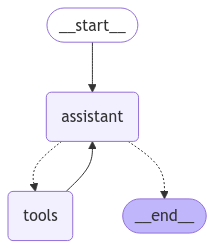

In [ ]:
# Define the builder
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define the edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2. Divide the output by 5")]
messages = react_graph.invoke({"messages": messages})

In [ ]:
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Add 3 and 4. Multiply the output by 2. Divide the output by 5
================================== Ai Message ==================================
Tool Calls:
  add (call_5YA3D8OuQEvqlaPqJlOhiSsn)
 Call ID: call_5YA3D8OuQEvqlaPqJlOhiSsn
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================
Tool Calls:
  multiply (call_oU4OQMH9jg3lNAvBzcQg14rn)
 Call ID: call_oU4OQMH9jg3lNAvBzcQg14rn
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14
================================== Ai Message ==================================
Tool Calls:
  divide (call_FopTxZEJloknt9lJwrJFW5Dl)
 Call ID: call_FopTxZEJloknt9lJwrJFW5Dl
  Args:
    a: 14
    b: 5
================================= Tool Message ===============

## Adding Memory to the Agent
Now, we're going extend our agent by introducing memory.

In [ ]:
# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

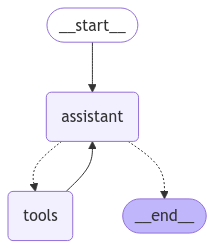

In [ ]:
# Graph
builder = StateGraph(MessagesState)

# Define nodes
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# View
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

## Memory

In [ ]:
messages = [HumanMessage(content="Add 3 and 4.")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_bFe0Ls0wtT409y2AuyIwJsS2)
 Call ID: call_bFe0Ls0wtT409y2AuyIwJsS2
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.


In [ ]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================

Could you please provide the number you would like to multiply by 2?


We can see that the model don't sem to have memory of the past conversation. It's because the state is transient ot a single graph execution. We can use persistence to address this!

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

When we use memory, we need to specify a thread_id.

This thread_id will store our collection of graph states.

In [ ]:
# Specify the thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 7 and 18.")]

# Run
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 7 and 18.
================================== Ai Message ==================================
Tool Calls:
  add (call_1guvM3FUWF1KOH28NquWrQEV)
 Call ID: call_1guvM3FUWF1KOH28NquWrQEV
  Args:
    a: 7
    b: 18
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 7 and 18 is 25.


In [ ]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 7 and 18.
================================== Ai Message ==================================
Tool Calls:
  add (call_1guvM3FUWF1KOH28NquWrQEV)
 Call ID: call_1guvM3FUWF1KOH28NquWrQEV
  Args:
    a: 7
    b: 18
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 7 and 18 is 25.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_NyvvtdgGsAOkP98spqBq3RbX)
 Call ID: call_NyvvtdgGsAOkP98spqBq3RbX
  Args:
    a: 25
    b: 2
================================= Tool Message =================================
Name: multiply

50
================================== Ai Message ==================================

Multiplying 25 

In [ ]:
messages = [HumanMessage(content="Divide that by 10")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 7 and 18.
================================== Ai Message ==================================
Tool Calls:
  add (call_1guvM3FUWF1KOH28NquWrQEV)
 Call ID: call_1guvM3FUWF1KOH28NquWrQEV
  Args:
    a: 7
    b: 18
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 7 and 18 is 25.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_NyvvtdgGsAOkP98spqBq3RbX)
 Call ID: call_NyvvtdgGsAOkP98spqBq3RbX
  Args:
    a: 25
    b: 2
================================= Tool Message =================================
Name: multiply

50
================================== Ai Message ==================================

Multiplying 25 